# Ejercicio 31
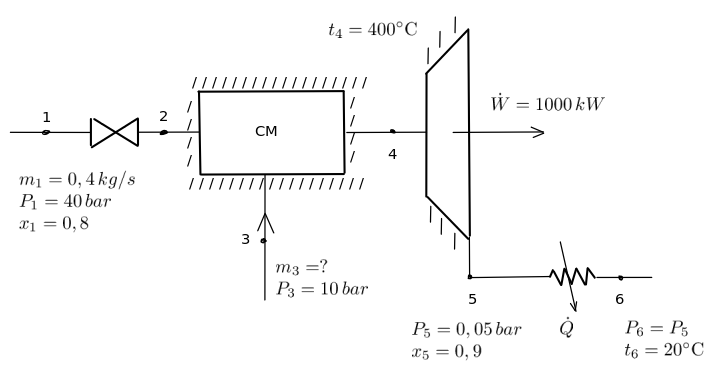

Se pide:
1. Estado de vapor en (2)
2. $m_3$ y estado vapor $(P, \, T, \, x)$
3. $Q$

## Solución

In [2]:
# Datos:
P_1 = 40e5 # [Pa]
x_1 = 0.8
m_1 = 0.4 # [kg/s]
P_3 = 10e5 # [Pa]
T_4 = 400 + 273.15 # [K]
W = 1000e3 # [W]
P_5 = 0.05e5 # [Pa]
x_5 = 0.9
P_6 = P_5
T_6 = 20 + 273.15 # [K]

In [3]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 7.5 MB/s 


---
### 1) Estado de vapor en (2)

Para la válvula reguladora:

$Q = 0$ y $W = 0$

Primer principio
$$ Q - W = \Delta H $$

Entonces
$$ 0 = \Delta H = m \, (h_s - h_e) $$

$$ h_s = h_e $$

$\left\{
\begin{array}{l}
P_1 = 40 \, \mbox{bar} \\
x_1 = 0,8
\end{array}
\right. \quad \rightarrow \quad h' \; , \; h'' \quad \rightarrow \quad h_1$

$$ h_1 = x_1 \, (h'' -h') + h' $$

In [4]:
hp1 = cp.PropsSI('H','P',P_1,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_1,'Q',1,'Water')

h_1 = x_1*(hp2 - hp1) + hp1

In [5]:
#@title 
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))

h_1 = 2458.15 [kJ/kg]


In [6]:
# o también
h_1 = cp.PropsSI('H','P',P_1,'Q',x_1,'Water')

In [7]:
#@title 
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))

h_1 = 2458.15 [kJ/kg]


$\left\{
\begin{array}{l}
P_2 = P_3 = 10 \, \mbox{bar} \\
h_2 = h_1
\end{array}
\right. \qquad \rightarrow \qquad h' \; , \; h''$

$$ x_2 = \frac{ h_2 -h' }{ h'' - h' } $$

In [8]:
P_2 = P_3
h_2 = h_1

In [9]:
hp1 = cp.PropsSI('H','P',P_2,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_2,'Q',1,'Water')

x_2 = (h_2 - hp1)/(hp2 - hp1)

T_2 = cp.PropsSI('T','P',P_2,'Q',x_2,'Water')

In [38]:
#@title 
print('Estado de vapor en (2)')
print('x_2 = %.4f'%x_2)
print('Temperatura en (2)')
print('T_2 = %.2f [K]'%T_2)
print('t_2 = %.2f[°C]'%(T_2 - 273.15))

Estado de vapor en (2)
x_2 = 0.8417
Temperatura en (2)
T_2 = 453.03 [K]
t_2 = 179.88[°C]


---
### 2) $m_3$ y estado vapor $(P,T,x)$

__Para la turbina tenemos__

$$ Q - W = \Delta H $$

$$ 0 - W = m_4 \, (h_5 -h_4) $$

$$ W = m_4 \, (h_4 - h_5) $$

In [13]:
# Sabemos que:
P_4 = P_3

In [14]:
h_4 = cp.PropsSI('H','P',P_4,'T',T_4,'Water')

In [15]:
#@title 
print('h_4 = %.2f [kJ/kg]'%(h_4/1000))

h_4 = 3264.47 [kJ/kg]


$$ h_5 = x_5 \, (h'' - h') + h' $$

In [16]:
hp1 = cp.PropsSI('H','P',P_5,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_5,'Q',1,'Water')

h_5 = x_5*(hp2 - hp1) + hp1

In [17]:
#@title
print('h_5 = %.2f [kJ/kg]'%(h_5/1000))

h_5 = 2318.43 [kJ/kg]


In [18]:
# o también
h_5 = cp.PropsSI('H','P',P_5,'Q',x_5,'Water')

In [19]:
#@title
print('h_5 = %.2f [kJ/kg]'%(h_5/1000))

h_5 = 2318.43 [kJ/kg]


$\left\{
\begin{array}{l}
\dot{m}_2 = \dot{m}_1 \\
\dot{m}_4  = \dot{m}_2 + \dot{m}_3
\end{array}
\right.$

$$ \dot{W} = \dot{m}_4 \, (h_4 - h_5) $$

$$ \dot{m}_4 = \frac{\dot{W}}{h_4 - h_5} $$

In [20]:
m_2 = m_1
m_4 = W/(h_4 - h_5)

In [21]:
#@title
print('m_4 = %.4f [kg/s]'%m_4)

m_4 = 1.0570 [kg/s]


$$ \dot{m}_3 = \dot{m}_4 - \dot{m}_2 $$

In [22]:
m_3 = m_4 - m_2

In [23]:
#@title 
print('m_3 = %.4f [kg/s]'%m_3)

m_3 = 0.6570 [kg/s]


__Para la cámara de mezcla__

$$ \dot{m}_2 h_2 + \dot{m}_3 h_3 = \dot{m}_4 h_4 $$

$$ h_3 = \frac{ \dot{m}_4 h_4 - \dot{m}_2 h_2 }{ \dot{m}_3 } $$

In [24]:
h_3 = (m_4*h_4 - m_2*h_2)/m_3

In [25]:
#@title 
print('h_3 = %.2f [kJ/kg]'%(h_3/1000))

h_3 = 3755.36 [kJ/kg]


In [26]:
cp.PhaseSI('P',P_3,'H',h_3,'Water')

'supercritical_gas'

__Entonces, no existe $x_3$__

In [27]:
T_3 = cp.PropsSI('T','P',P_3,'H',h_3,'Water')

In [37]:
#@title Resultado
print('m_3 = %.4f [kg/s]'%m_3)
print('P_3 = %.0f [kPa]'%(P_3/1000))
print('T_3 = %.2f [K]'%T_3)
print('t_3 = %.2f [°C]'%(T_3 - 273.15))
print('x_3 no existe')

m_3 = 0.6570 [kg/s]
P_3 = 1000 [kPa]
T_3 = 898.60 [K]
t_3 = 625.45 [°C]
x_3 no existe


---
### 3) $Q$

In [29]:
h_6 = cp.PropsSI('H','P',P_6,'T',T_6,'Water')

In [30]:
#@title 
print('h_6 = %.2f [kJ/kg]'%(h_6/1000))

h_6 = 83.92 [kJ/kg]


In [31]:
m_5 = m_4

$$ \dot{Q} = m_5 \, (h_6 - h_5) $$

In [32]:
Q = m_5*(h_6 - h_5)

In [33]:
#@title Resultado
print('Q = %.2f [kJ/s]'%(Q/1000))

Q = -2361.95 [kJ/s]
